In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [30]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [29]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:

y_test = y_test.reshape(-1,)

In [10]:
classes = ["thai food ","lao food","mianmafood","USA food ","UK food","vietnam food","china food","europe food","dog food","cat food"]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

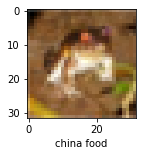

In [12]:
plot_sample(X_train, y_train, 0)

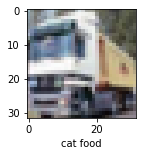

In [13]:
plot_sample(X_train, y_train, 1)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 89s 54ms/step - loss: 1.8171 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.6242 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5450 - accuracy: 0.4552
Epoch 4/5
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4825 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4354 - accuracy: 0.4944


In [16]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.51      0.53      1000
           1       0.70      0.47      0.56      1000
           2       0.38      0.27      0.32      1000
           3       0.41      0.19      0.26      1000
           4       0.30      0.64      0.41      1000
           5       0.44      0.33      0.38      1000
           6       0.58      0.37      0.45      1000
           7       0.55      0.53      0.54      1000
           8       0.47      0.76      0.58      1000
           9       0.51      0.61      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



In [17]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 53s 33ms/step - loss: 1.4855 - accuracy: 0.4644
Epoch 2/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1133 - accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9839 - accuracy: 0.6561
Epoch 4/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9073 - accuracy: 0.6839
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8464 - accuracy: 0.7053
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7935 - accuracy: 0.7248
Epoch 7/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.7510 - accuracy: 0.7365
Epoch 8/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7094 - accuracy: 0.7520
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6720 - accuracy: 0.7636
Epoch 10/10
1563/1563 [==============================] - 39s 25m

In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9698 - accuracy: 0.6814


[0.9697715044021606, 0.6814000010490417]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]


array([[2.0896731e-04, 1.8237189e-03, 5.9359400e-03, 8.2099020e-01,
        2.2716341e-03, 1.9594410e-02, 4.9337458e-02, 5.2238617e-04,
        9.8685846e-02, 6.2943506e-04],
       [9.5193740e-04, 3.6227080e-01, 5.9693775e-07, 1.1636614e-06,
        3.9204379e-10, 3.7401393e-09, 3.9728715e-08, 2.3923940e-08,
        6.3604701e-01, 7.2841300e-04],
       [8.4564112e-02, 2.4882512e-01, 2.5137996e-02, 3.8628662e-03,
        5.3768731e-03, 1.7634905e-03, 1.2452569e-03, 5.8502937e-03,
        5.7706422e-01, 4.6309844e-02],
       [9.0393907e-01, 3.3827135e-03, 3.1162871e-02, 2.8488835e-04,
        7.0322817e-03, 3.9396804e-05, 1.5338967e-04, 2.0378915e-04,
        5.3723238e-02, 7.8381890e-05],
       [6.6674875e-07, 8.1653170e-06, 1.1360912e-03, 8.7823242e-02,
        2.7276645e-03, 8.7631901e-04, 9.0720046e-01, 4.0097717e-07,
        2.2660778e-04, 3.4210305e-07]], dtype=float32)

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]


array([[2.0896731e-04, 1.8237189e-03, 5.9359400e-03, 8.2099020e-01,
        2.2716341e-03, 1.9594410e-02, 4.9337458e-02, 5.2238617e-04,
        9.8685846e-02, 6.2943506e-04],
       [9.5193740e-04, 3.6227080e-01, 5.9693775e-07, 1.1636614e-06,
        3.9204379e-10, 3.7401393e-09, 3.9728715e-08, 2.3923940e-08,
        6.3604701e-01, 7.2841300e-04],
       [8.4564112e-02, 2.4882512e-01, 2.5137996e-02, 3.8628662e-03,
        5.3768731e-03, 1.7634905e-03, 1.2452569e-03, 5.8502937e-03,
        5.7706422e-01, 4.6309844e-02],
       [9.0393907e-01, 3.3827135e-03, 3.1162871e-02, 2.8488835e-04,
        7.0322817e-03, 3.9396804e-05, 1.5338967e-04, 2.0378915e-04,
        5.3723238e-02, 7.8381890e-05],
       [6.6674875e-07, 8.1653170e-06, 1.1360912e-03, 8.7823242e-02,
        2.7276645e-03, 8.7631901e-04, 9.0720046e-01, 4.0097717e-07,
        2.2660778e-04, 3.4210305e-07]], dtype=float32)

In [23]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

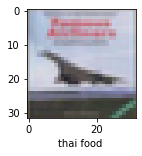

In [24]:
plot_sample(X_test, y_test,3)

In [25]:
classes[y_classes[3]]

NameError: name 'y_classes' is not defined

In [26]:
classes[y_classes[3]]

NameError: name 'y_classes' is not defined